<a href="https://colab.research.google.com/github/steven-seojin-kim/steven-seojin-kim.github.io/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os

In [ ]:
import re
import string
from collections import namedtuple, Counter

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
def scrape_shakespeare_plays(SHAKESPEARE_URL):
    session = requests.Session()
    homepage = session.get(SHAKESPEARE_URL)
    soup = BeautifulSoup(homepage.content, "html.parser")
    Line = namedtuple('Line', ['play_name', 'genre', 'sentence', 'text'])

    texts = []
    main_table = soup.find_all('table')[1]
    genres = [td.text.strip() for td in main_table.find_all('tr')[0].find_all('td') if td.text.strip() != 'Poetry']
    plays = main_table.find_all('tr')[1].find_all('td')

    for genre, play_td in zip(genres, plays):
        for link in play_td.find_all('a'):
            play_name = link.text.strip()
            play_url = f"{SHAKESPEARE_URL}/{link['href'].replace('index', 'full')}"
            play_page = session.get(play_url)
            play_soup = BeautifulSoup(play_page.content, "html.parser")

            for tag in play_soup.find_all('a', {'name': re.compile('speech.*')}):
                speech_block = tag.find_next_sibling('blockquote')
                if speech_block:
                    for sentence_tag in speech_block.find_all('a'):
                        act, scene, sentence_id = sentence_tag['name'].split('.')
                        text = sentence_tag.text.strip()
                        texts.append(Line(play_name, genre, sentence_id, text))

    return pd.DataFrame(texts)

In [ ]:
SHAKESPEARE_URL = 'http://shakespeare.mit.edu/'

shakespeare_plays = scrape_shakespeare_plays(SHAKESPEARE_URL)
shakespeare_plays['sentence'] = shakespeare_plays['sentence'].astype(np.int16)
display(shakespeare_plays)

,play_name,genre,sentence,text
0,All's Well That Ends Well,Comedy,1,"In delivering my son from me, I bury a second ..."
1,All's Well That Ends Well,Comedy,2,"And I in going, madam, weep o'er my father's d..."
2,All's Well That Ends Well,Comedy,3,"anew: but I must attend his majesty's command, to"
3,All's Well That Ends Well,Comedy,4,"whom I am now in ward, evermore in subjection."
4,All's Well That Ends Well,Comedy,5,"You shall find of the king a husband, madam; you,"
...,...,...,...,...
108088,Titus Andronicus,Tragedy,201,"And, being so, shall have like want of pity."
108089,Titus Andronicus,Tragedy,202,"See justice done on Aaron, that damn'd Moor,"
108090,Titus Andronicus,Tragedy,203,By whom our heavy haps had their beginning:
108091,Titus Andronicus,Tragedy,204,"Then, afterwards, to order well the state,"


In [ ]:
shakespeare_plays_texts = shakespeare_plays.groupby(['play_name'], as_index=False)['text'].apply(lambda x: ' '.join(x))
display(shakespeare_plays_texts)

,play_name,text
0,A Midsummer Night's Dream,"Now, fair Hippolyta, our nuptial hour Draws on..."
1,All's Well That Ends Well,"In delivering my son from me, I bury a second ..."
2,Antony and Cleopatra,"Nay, but this dotage of our general's O'erflow..."
3,As You Like It,"As I remember, Adam, it was upon this fashion ..."
4,Coriolanus,"Before we proceed any further, hear me speak. ..."
5,Cymbeline,You do not meet a man but frowns: our bloods N...
6,Hamlet,"Who's there? Nay, answer me: stand, and unfold..."
7,"Henry IV, part 1","So shaken as we are, so wan with care, Find we..."
8,"Henry IV, part 2",Open your ears; for which of you will stop The...
9,Henry V,"O for a Muse of fire, that would ascend The br..."


In [ ]:
shakespeare_plays_texts.loc[7, 'play_name'] = 'Henry 4, part 1'
shakespeare_plays_texts.loc[8, 'play_name'] = 'Henry 4, part 2'
shakespeare_plays_texts.loc[9, 'play_name'] = 'Henry 5'
shakespeare_plays_texts.loc[10, 'play_name'] = 'Henry 6, part 1'
shakespeare_plays_texts.loc[11, 'play_name'] = 'Henry 6, part 2'
shakespeare_plays_texts.loc[12, 'play_name'] = 'Henry 6, part 3'
shakespeare_plays_texts.loc[13, 'play_name'] = 'Henry 8'
shakespeare_plays_texts.loc[23, 'play_name'] = 'Richard 2'
shakespeare_plays_texts.loc[24, 'play_name'] = 'Richard 3'
shakespeare_plays_texts.loc[27, 'play_name'] = 'The Merry Wives of Windsor'

In [ ]:
shakespeare_plays_texts['play_name'] = shakespeare_plays_texts['play_name'].str.lower()

In [ ]:
shakespeare_plays_texts.insert(1, 'acronym', shakespeare_plays_texts['play_name'].str.split().apply(lambda words: ''.join(word[0] for word in words)))

In [ ]:
shakespeare_plays_texts.loc[4, 'acronym'] = 'cor'
shakespeare_plays_texts.loc[5, 'acronym'] = 'cym'
shakespeare_plays_texts.loc[6, 'acronym'] = 'ham'
shakespeare_plays_texts.loc[18, 'acronym'] = 'mac'
shakespeare_plays_texts.loc[21, 'acronym'] = 'oth'
display(shakespeare_plays_texts)

,play_name,acronym,text
0,a midsummer night's dream,amnd,"Now, fair Hippolyta, our nuptial hour Draws on..."
1,all's well that ends well,awtew,"In delivering my son from me, I bury a second ..."
2,antony and cleopatra,aac,"Nay, but this dotage of our general's O'erflow..."
3,as you like it,ayli,"As I remember, Adam, it was upon this fashion ..."
4,coriolanus,cor,"Before we proceed any further, hear me speak. ..."
5,cymbeline,cym,You do not meet a man but frowns: our bloods N...
6,hamlet,ham,"Who's there? Nay, answer me: stand, and unfold..."
7,"henry 4, part 1",h4p1,"So shaken as we are, so wan with care, Find we..."
8,"henry 4, part 2",h4p2,Open your ears; for which of you will stop The...
9,henry 5,h5,"O for a Muse of fire, that would ascend The br..."


In [ ]:
# Function to save texts to files and create a zip archive
def save_texts_to_zip(df, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for index, row in df.iterrows():
            file_name = f"{row['acronym']}.txt"
            with open(file_name, 'w') as file:
                file.write(row['text'])
            zipf.write(file_name)
            os.remove(file_name)

# Name of the zip file
zip_filename = 'texts.zip'

# Save texts to zip
save_texts_to_zip(shakespeare_plays_texts, zip_filename)

files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

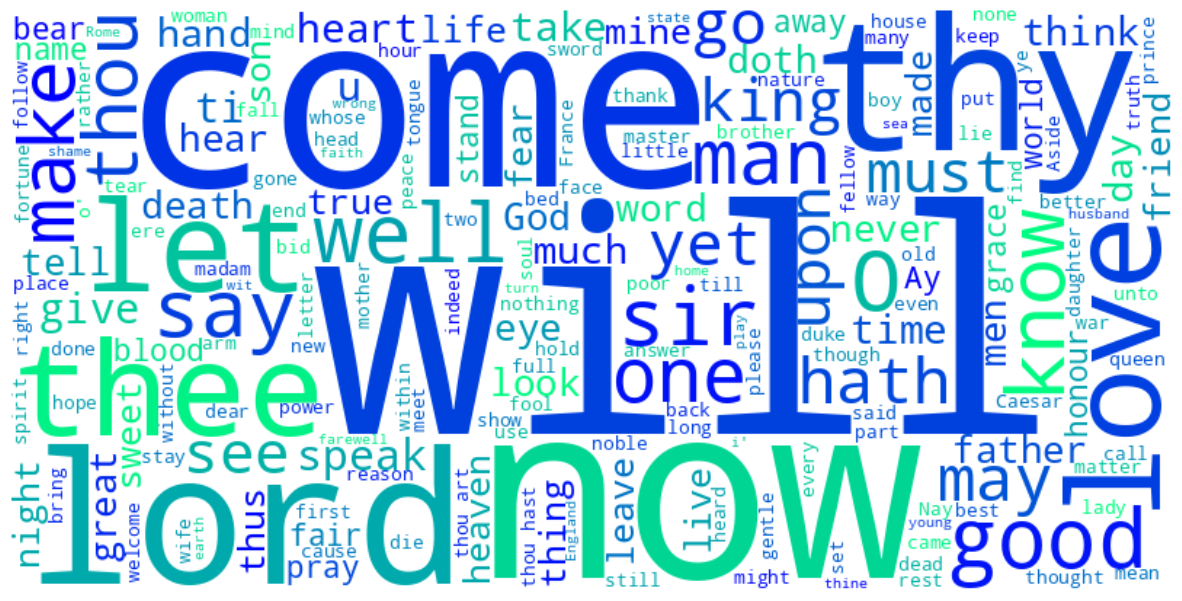

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(shakespeare_plays['text'])

wordcloud = WordCloud(width=800, height=400, colormap='winter', background_color='white').generate(all_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

processed_text = preprocess_text(all_text)

words = processed_text.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(100)

most_common_words_only = [word for word, frequency in most_common_words]
most_common_words_only.sort()

result_text = ' '.join(most_common_words_only)

file_path = 'function_words.txt'
with open(file_path, 'w') as output_file:
    output_file.write(result_text)

files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>